In [25]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [26]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [27]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [28]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import pickle


import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)
import pickle
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc
import pickle
import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs

import arrow
import gsw
%matplotlib inline

In [29]:

#mmols/m
BR_DIC = pickle.load(open('./pickles/BR_sums_perday.pkl', 'rb')) 
LA_DIC = pickle.load(open('./pickles/LA_sums_perday.pkl', 'rb')) 
PI_DIC = pickle.load(open('./pickles/PI_sums_perday.pkl', 'rb')) 
csize = pickle.load(open('./pickles/cellsize.pkl', 'rb'))
BR_NIT = pickle.load(open('./pickles/BR_sums_perday_nitrate.pkl', 'rb')) 
LA_NIT = pickle.load(open('./pickles/LA_sums_perday_nitrate.pkl', 'rb')) 
PI_NIT = pickle.load(open('./pickles/PI_sums_perday_nitrate.pkl', 'rb')) 


## diff is BR - (the run) difference. 
## red = BR, blue = PI, grey = LA
#### hm.


In [30]:
print(np.shape(BR_DIC))
print(np.shape(csize))
cellsize_alldomain = np.sum(np.sum(csize,axis = 1),axis = 1)
csize_broad = np.zeros((40,365))
for i in range(0,365):
    csize_broad[:,i] = cellsize_alldomain

(40, 365)
(40, 898, 398)


In [31]:
print(np.max(BR_DIC))

463235410439838.56


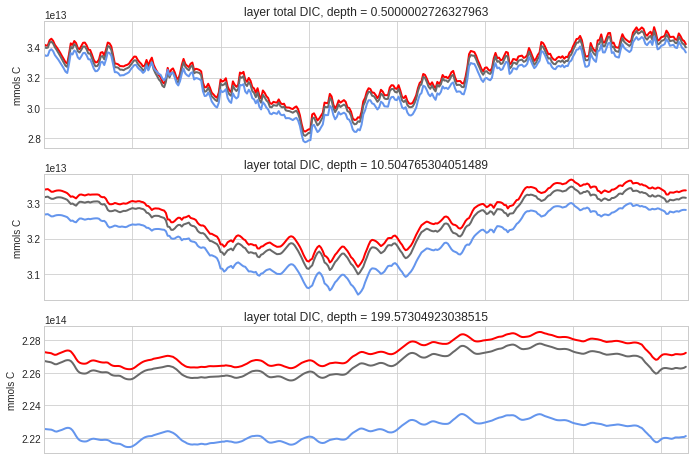

In [32]:
test_LO = nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_y2018m01d01.nc')
zlevels = (test_LO['deptht'][:])

fact = 0.65
fig = plt.figure(figsize=(15*fact,10*fact))
days_in = np.arange(0,365,1)
lw = 2

ax = fig.add_subplot(3,1,1)
depth = 0
zdepth = zlevels[depth]
ax.plot(days_in,BR_DIC[depth,:],color = 'red',label = 'BR', linewidth = lw)
ax.plot(days_in,LA_DIC[depth,:],color = 'dimgrey',label = 'LA', linewidth = lw)
ax.plot(days_in,PI_DIC[depth,:],color = 'cornflowerblue',label = 'PI', linewidth = lw)
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mmols C')
plt.title('layer total DIC, depth = '+str(zdepth))

ax = fig.add_subplot(3,1,2)
depth = 10
zdepth = zlevels[depth]
ax.plot(days_in,BR_DIC[depth,:],color = 'red',label = 'BR', linewidth = lw)
ax.plot(days_in,LA_DIC[depth,:],color = 'dimgrey',label = 'LA', linewidth = lw)
ax.plot(days_in,PI_DIC[depth,:],color = 'cornflowerblue',label = 'PI', linewidth = lw)
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mmols C')
plt.title('layer total DIC, depth = '+str(zdepth))

ax = fig.add_subplot(3,1,3)
depth = 30
zdepth = zlevels[depth]
ax.plot(days_in,BR_DIC[depth,:],color = 'red',label = 'BR', linewidth = lw)
ax.plot(days_in,LA_DIC[depth,:],color = 'dimgrey',label = 'LA', linewidth = lw)
ax.plot(days_in,PI_DIC[depth,:],color = 'cornflowerblue',label = 'PI', linewidth = lw)
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mmols C')
plt.title('layer total DIC, depth = '+str(zdepth))

 

plt.tight_layout()


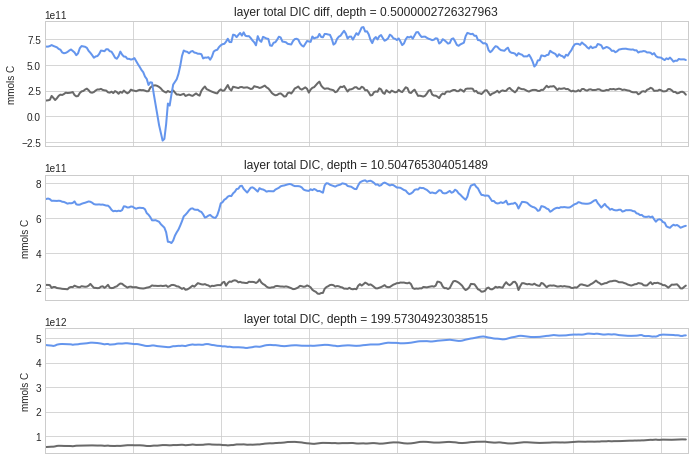

In [33]:
test_LO = nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_y2018m01d01.nc')
zlevels = (test_LO['deptht'][:])

fact = 0.65
fig = plt.figure(figsize=(15*fact,10*fact))
days_in = np.arange(0,365,1)
lw = 2

ax = fig.add_subplot(3,1,1)
depth = 0
zdepth = zlevels[depth]
#ax.plot(days_in,BR_DIC[depth,:],color = 'red',label = 'BR', linewidth = lw)
ax.plot(days_in,BR_DIC[depth,:]-LA_DIC[depth,:],color = 'dimgrey',label = 'LA', linewidth = lw)
ax.plot(days_in,BR_DIC[depth,:]-PI_DIC[depth,:],color = 'cornflowerblue',label = 'PI', linewidth = lw)
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mmols C')
plt.title('layer total DIC diff, depth = '+str(zdepth))

ax = fig.add_subplot(3,1,2)
depth = 10
zdepth = zlevels[depth]
#ax.plot(days_in,BR_DIC[depth,:],color = 'red',label = 'BR', linewidth = lw)
ax.plot(days_in,BR_DIC[depth,:]-LA_DIC[depth,:],color = 'dimgrey',label = 'LA', linewidth = lw)
ax.plot(days_in,BR_DIC[depth,:]-PI_DIC[depth,:],color = 'cornflowerblue',label = 'PI', linewidth = lw)
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mmols C')
plt.title('layer total DIC, depth = '+str(zdepth))

ax = fig.add_subplot(3,1,3)
depth = 30
zdepth = zlevels[depth]
#ax.plot(days_in,BR_DIC[depth,:],color = 'red',label = 'BR', linewidth = lw)
ax.plot(days_in,BR_DIC[depth,:]-LA_DIC[depth,:],color = 'dimgrey',label = 'LA', linewidth = lw)
ax.plot(days_in,BR_DIC[depth,:]-PI_DIC[depth,:],color = 'cornflowerblue',label = 'PI', linewidth = lw)
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mmols C')
plt.title('layer total DIC, depth = '+str(zdepth))

 

plt.tight_layout()


## nitrate

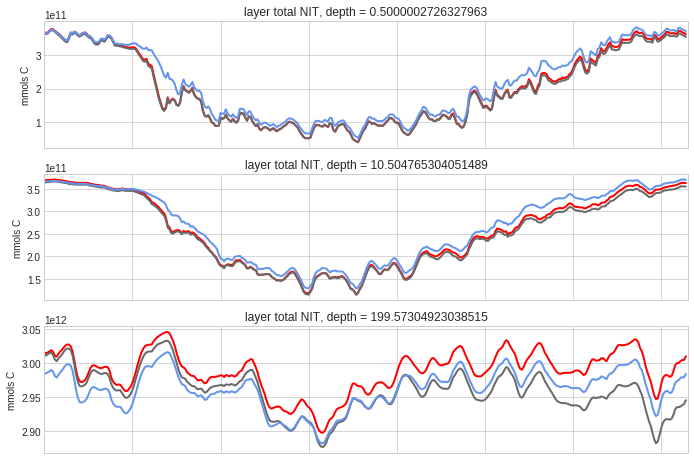

In [34]:
test_LO = nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_y2018m01d01.nc')
zlevels = (test_LO['deptht'][:])

fact = 0.65
fig = plt.figure(figsize=(15*fact,10*fact))
days_in = np.arange(0,365,1)
lw = 2

ax = fig.add_subplot(3,1,1)
depth = 0
zdepth = zlevels[depth]
ax.plot(days_in,BR_NIT[depth,:],color = 'red',label = 'BR', linewidth = lw)
ax.plot(days_in,LA_NIT[depth,:],color = 'dimgrey',label = 'LA', linewidth = lw)
ax.plot(days_in,PI_NIT[depth,:],color = 'cornflowerblue',label = 'PI', linewidth = lw)
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mmols C')
plt.title('layer total NIT, depth = '+str(zdepth))

ax = fig.add_subplot(3,1,2)
depth = 10
zdepth = zlevels[depth]
ax.plot(days_in,BR_NIT[depth,:],color = 'red',label = 'BR', linewidth = lw)
ax.plot(days_in,LA_NIT[depth,:],color = 'dimgrey',label = 'LA', linewidth = lw)
ax.plot(days_in,PI_NIT[depth,:],color = 'cornflowerblue',label = 'PI', linewidth = lw)
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mmols C')
plt.title('layer total NIT, depth = '+str(zdepth))

ax = fig.add_subplot(3,1,3)
depth = 30
zdepth = zlevels[depth]
ax.plot(days_in,BR_NIT[depth,:],color = 'red',label = 'BR', linewidth = lw)
ax.plot(days_in,LA_NIT[depth,:],color = 'dimgrey',label = 'LA', linewidth = lw)
ax.plot(days_in,PI_NIT[depth,:],color = 'cornflowerblue',label = 'PI', linewidth = lw)
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mmols C')
plt.title('layer total NIT, depth = '+str(zdepth))

 

plt.tight_layout()


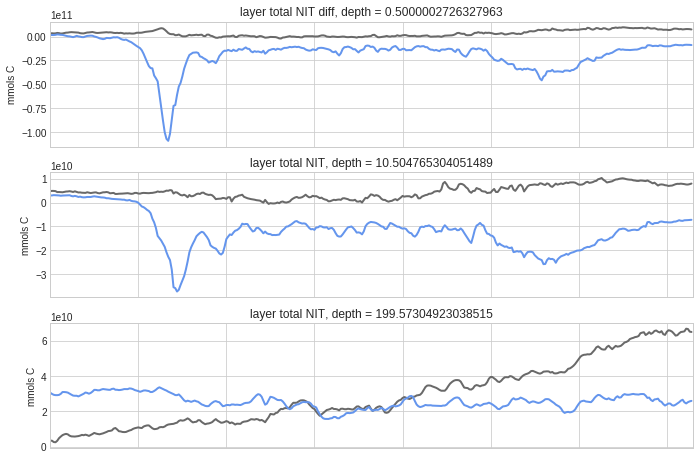

In [35]:
test_LO = nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_y2018m01d01.nc')
zlevels = (test_LO['deptht'][:])

fact = 0.65
fig = plt.figure(figsize=(15*fact,10*fact))
days_in = np.arange(0,365,1)
lw = 2

ax = fig.add_subplot(3,1,1)
depth = 0
zdepth = zlevels[depth]
#ax.plot(days_in,BR_NIT[depth,:],color = 'red',label = 'BR', linewidth = lw)
ax.plot(days_in,BR_NIT[depth,:]-LA_NIT[depth,:],color = 'dimgrey',label = 'LA', linewidth = lw)
ax.plot(days_in,BR_NIT[depth,:]-PI_NIT[depth,:],color = 'cornflowerblue',label = 'PI', linewidth = lw)
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mmols C')
plt.title('layer total NIT diff, depth = '+str(zdepth))

ax = fig.add_subplot(3,1,2)
depth = 10
zdepth = zlevels[depth]
#ax.plot(days_in,BR_NIT[depth,:],color = 'red',label = 'BR', linewidth = lw)
ax.plot(days_in,BR_NIT[depth,:]-LA_NIT[depth,:],color = 'dimgrey',label = 'LA', linewidth = lw)
ax.plot(days_in,BR_NIT[depth,:]-PI_NIT[depth,:],color = 'cornflowerblue',label = 'PI', linewidth = lw)
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mmols C')
plt.title('layer total NIT, depth = '+str(zdepth))

ax = fig.add_subplot(3,1,3)
depth = 30
zdepth = zlevels[depth]
#ax.plot(days_in,BR_NIT[depth,:],color = 'red',label = 'BR', linewidth = lw)
ax.plot(days_in,BR_NIT[depth,:]-LA_NIT[depth,:],color = 'dimgrey',label = 'LA', linewidth = lw)
ax.plot(days_in,BR_NIT[depth,:]-PI_NIT[depth,:],color = 'cornflowerblue',label = 'PI', linewidth = lw)
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mmols C')
plt.title('layer total NIT, depth = '+str(zdepth))

 

plt.tight_layout()
